In [1]:
import os
import torch
import utils
import models
import config
from pathlib import Path
from torch.utils.data import DataLoader
from dataset import ANI717Dataset
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from models import Generator, Critic, initialize_weights
from torchvision.utils import save_image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
model_gen = Generator(config.Z_DIM, config.IMG_CHANNELS, config.GEN_FEATURES).to(config.DEVICE)
model_critic = Critic(config.IMG_CHANNELS, config.CRITIC_FEATURES).to(config.DEVICE)

In [3]:
epoch = 40
optimizer_gen = optim.Adam(model_gen.parameters(), lr=config.LEARNING_RATE, betas=(0.5, 0.9))
optimizer_critic = optim.Adam(model_critic.parameters(), lr=config.LEARNING_RATE, betas=(0.5, 0.9))
criterion = nn.BCELoss()

In [4]:
utils.load_checkpoint(f'checkpoints/generator{epoch}.pth', model_gen, optimizer_gen, config.LEARNING_RATE)
utils.load_checkpoint(f'checkpoints/critic{epoch}.pth', model_critic, optimizer_critic, config.LEARNING_RATE)

In [5]:
fixed_noise = torch.randn(64, config.Z_DIM, 1, 1).to(config.DEVICE)
fake = model_gen(fixed_noise)
fake.shape

torch.Size([64, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


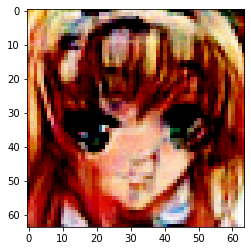

In [6]:
plt.imshow(fake[0].cpu().detach().permute(1, 2, 0))

In [7]:
etas = [0.003, 0.001, 0.008, 0.006]

In [8]:
critic_fake = model_critic(fake)

In [9]:
gradients = torch.autograd.grad(outputs=critic_fake, inputs=fake,
                              grad_outputs=torch.ones(critic_fake.size()).cuda(),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

In [10]:
gradients.shape

torch.Size([64, 3, 64, 64])

In [11]:
new = []
for eta in etas:
    new.append(fake - gradients * eta)

In [12]:
import visualization_utils

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


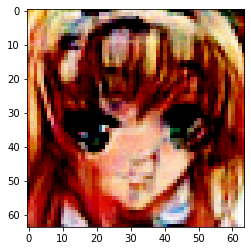

In [13]:
plt.imshow(fake[0].cpu().detach().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


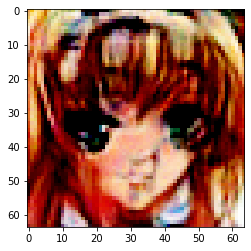

In [14]:
plt.imshow(new[0][0].cpu().detach().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


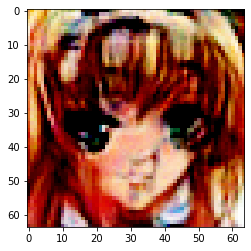

In [15]:
plt.imshow(new[1][0].cpu().detach().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


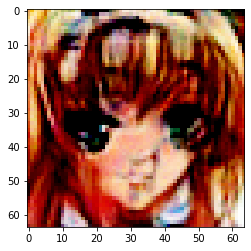

In [16]:
plt.imshow(new[2][0].cpu().detach().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


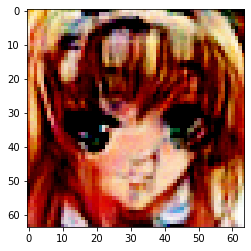

In [17]:
plt.imshow(new[3][0].cpu().detach().permute(1, 2, 0))

In [18]:
gradient, fake = visualization_utils.compute_gradient(40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


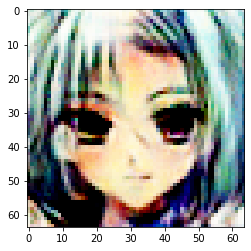

In [19]:
plt.imshow(fake[0].cpu().detach().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

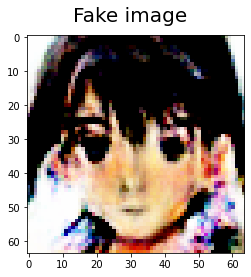

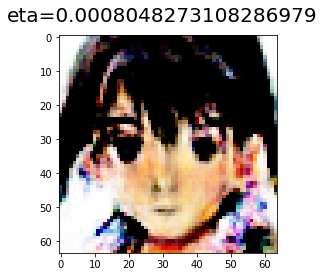

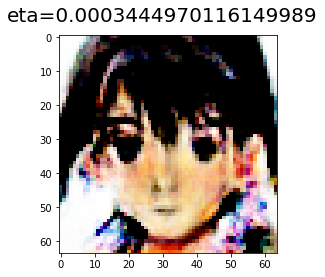

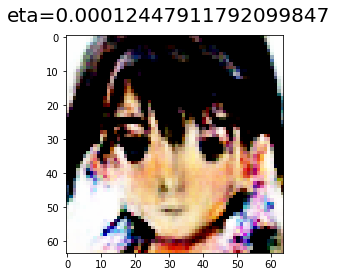

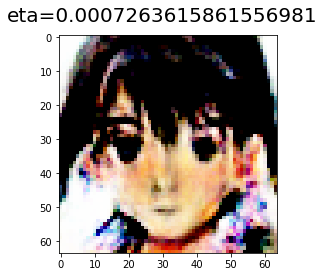

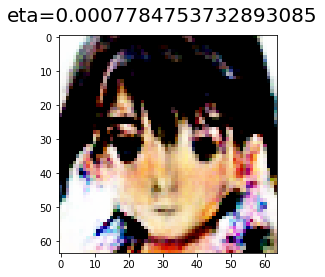

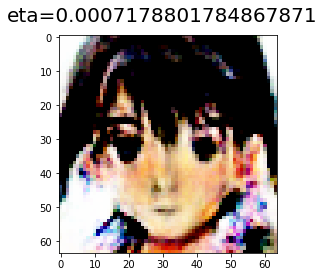

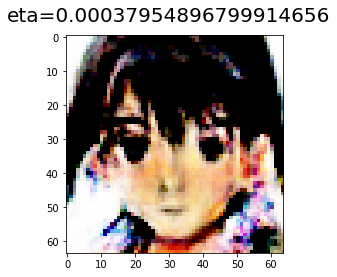

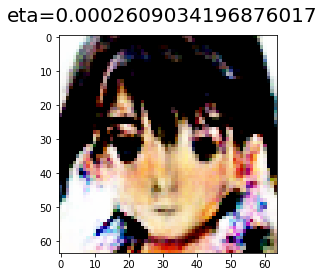

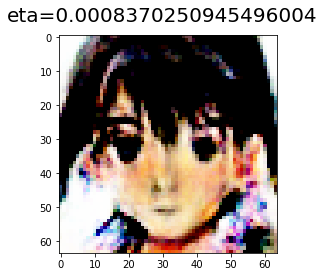

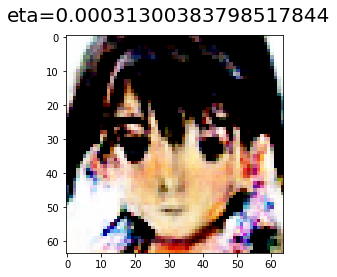

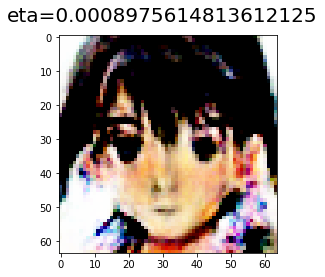

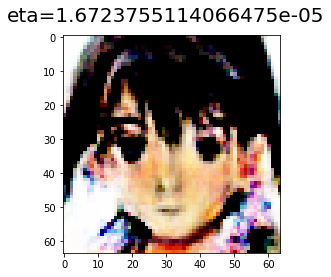

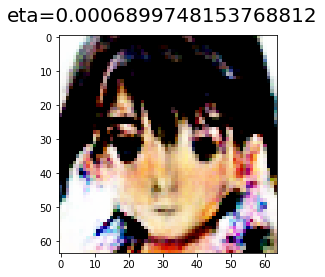

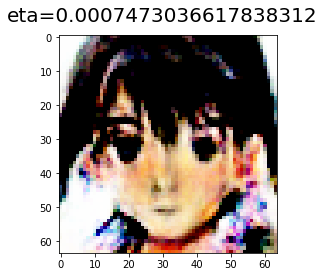

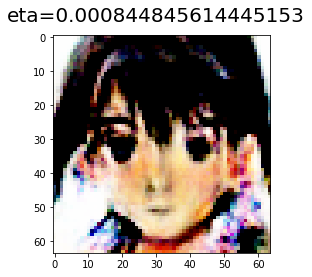

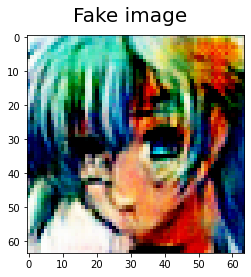

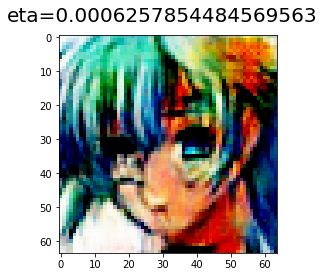

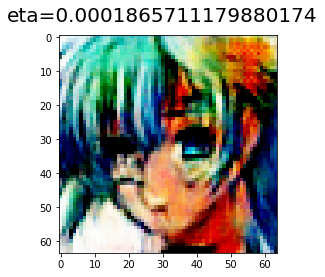

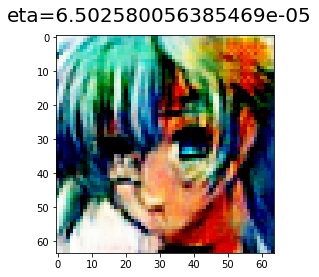

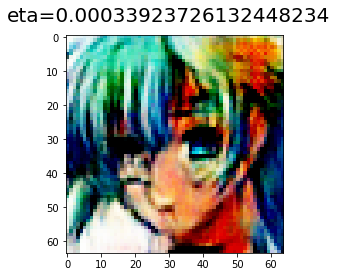

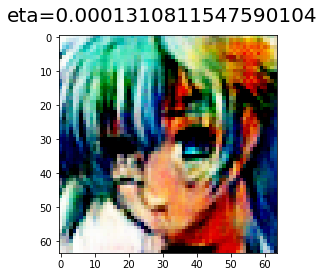

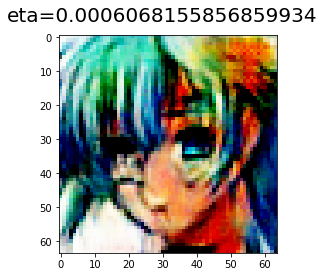

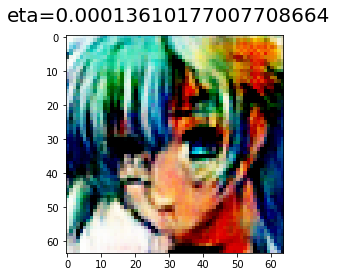

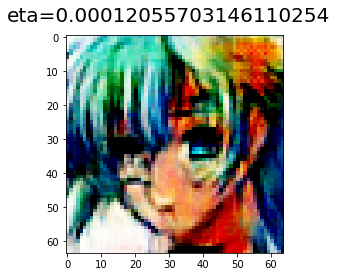

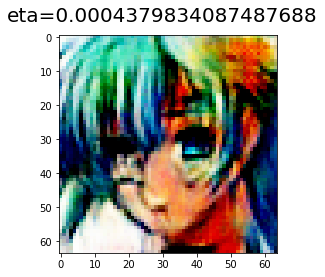

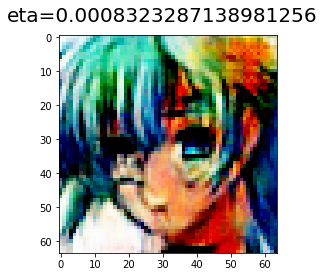

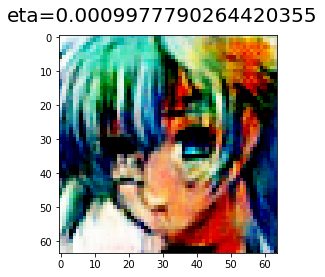

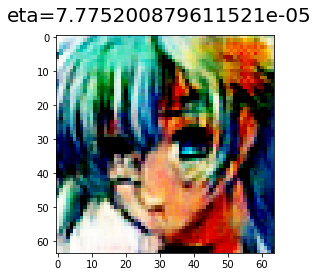

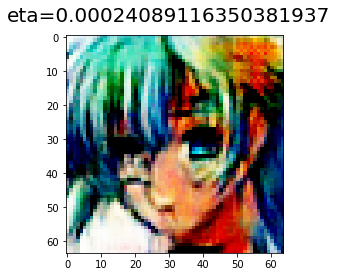

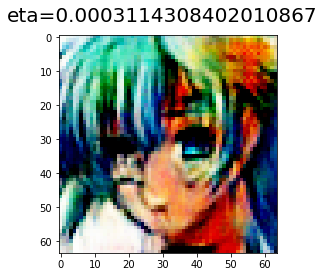

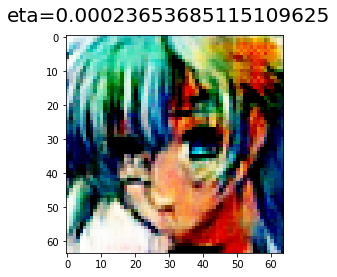

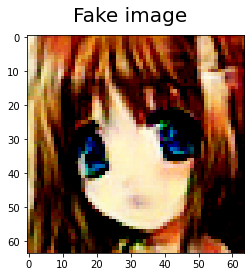

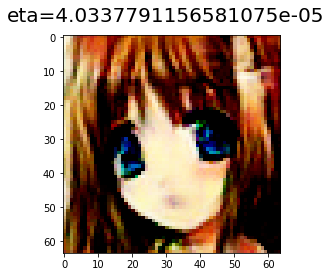

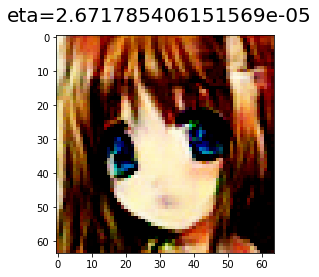

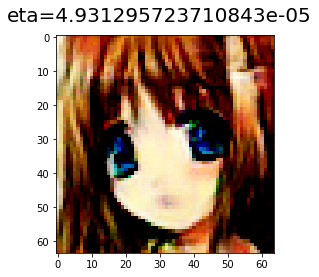

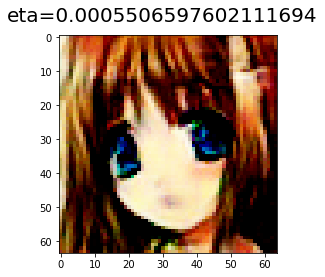

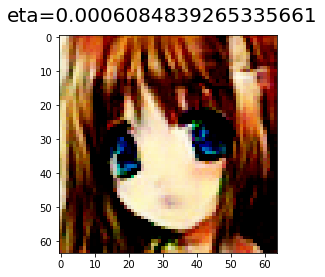

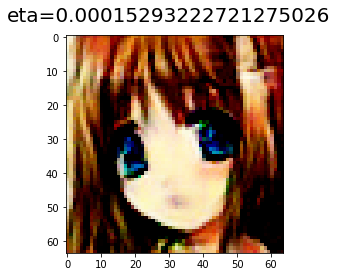

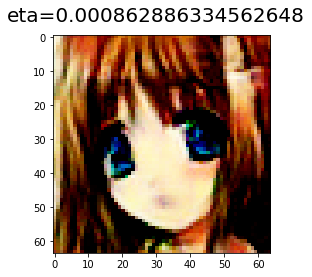

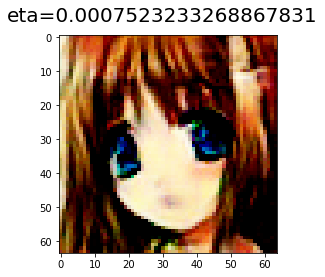

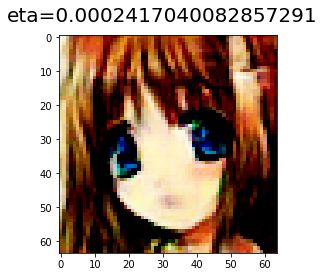

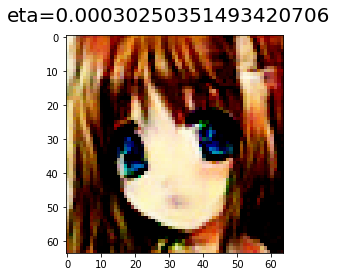

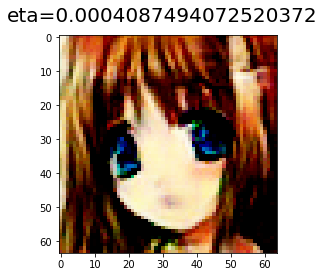

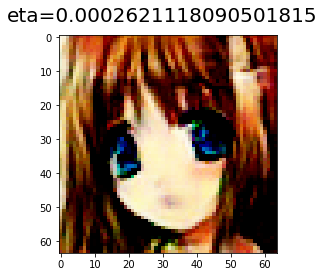

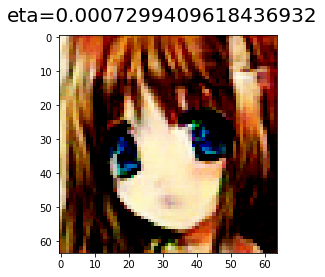

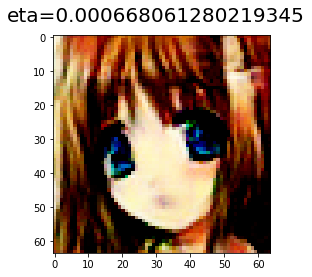

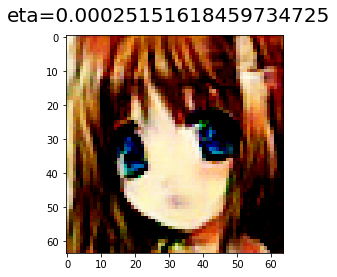

In [20]:
epochs = [10, 40, 80]
for epoch in epochs:
    visualization_utils.visualize(epoch, etas_size=15)